# Analyza pouziteho datasetu pre projekt z Neuronovych sieti

## Pouzity dataset CIFAR-10 a CIFAR-100

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import os
import pickle

In [2]:
path_to_dataset = "F:/Datasets/CIFAR-10/"
classes = 10

Obrazové dáta v datasete CIFAR 10 (a rovnako 100) sú uložené v chunkoch po 10000 obrazov. Sú dostupné rôzne formáty pre načítanie - pre python je najvhodnejšia možnosť pickle dumpov. 
Formát uložených dát je (-1, 3072) = flatnuté obrázky, preto pre ich použitie je potrebné ich reshapnuť na čitateľný formát - W,H,C. Obrázky sú však uložené v poradí C,W,H, preto sme ich transponovali na tensorflowom požadované poradie dimenzií.

Vstupné dáta sú uložené vo farebnej škále RGB s 8-bitovou farebnou hĺbkou.
Prvotná normalizácia je preškálovanie z *int* 0-255 na 0-1 *float*.

Trénovacie dáta je možné ľahko oddeliť od testovacích. Dataset neobsahuje Validačné dáta - je preto potrebné rozdeliť trénovací dataset.

In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict[b'data'], dict[b'labels']

In [4]:
with open(path_to_dataset + "data_batch_1", 'rb') as file:
    dict_k = pickle.load(file, encoding='bytes')
dict_k.keys()


dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [5]:
for l,f in zip(dict_k[b'labels'][:20], dict_k[b'filenames'][:20]):
    print("Data label:",l, "filename:", f)
print('...')

Data label: 6 filename: b'leptodactylus_pentadactylus_s_000004.png'
Data label: 9 filename: b'camion_s_000148.png'
Data label: 9 filename: b'tipper_truck_s_001250.png'
Data label: 4 filename: b'american_elk_s_001521.png'
Data label: 1 filename: b'station_wagon_s_000293.png'
Data label: 1 filename: b'coupe_s_001735.png'
Data label: 2 filename: b'cassowary_s_001300.png'
Data label: 7 filename: b'cow_pony_s_001168.png'
Data label: 8 filename: b'sea_boat_s_001584.png'
Data label: 3 filename: b'tabby_s_001355.png'
Data label: 4 filename: b'muntjac_s_001000.png'
Data label: 7 filename: b'arabian_s_001354.png'
Data label: 7 filename: b'quarter_horse_s_000672.png'
Data label: 2 filename: b'passerine_s_000343.png'
Data label: 9 filename: b'camion_s_001895.png'
Data label: 9 filename: b'trailer_truck_s_000335.png'
Data label: 9 filename: b'dumper_s_000821.png'
Data label: 3 filename: b'alley_cat_s_000200.png'
Data label: 2 filename: b'accentor_s_000677.png'
Data label: 6 filename: b'frog_s_00167

Formát uložených dát je (-1, 3072) = flatnuté obrázky, preto pre ich použitie je potrebné ich reshapnuť na čitateľný formát - W,H,C. Obrázky sú však uložené v poradí C,W,H, preto sme ich transponovali na tensorflowom požadované poradie dimenzií.

Vstupné dáta sú uložené vo farebnej škále RGB s 8-bitovou farebnou hĺbkou.
Prvotná normalizácia je preškálovanie z *int* 0-255 na 0-1 *float*.

Trénovacie dáta je možné ľahko oddeliť od testovacích. Dataset neobsahuje Validačné dáta - je preto potrebné rozdeliť trénovací dataset.

In [3]:
def load_dataset(path):
    files = os.listdir(path)
    train_x = []
    train_y = []
    test_x = []
    test_y = []
    if len(files) > 0:
        for f in files:
            if 'preprocessed' in f:
                continue
            else:
                file = os.path.join(path, f)
                data, labels = unpickle(file)
                if not 'test' in file.lower():
                    if len(train_x) == 0:
                        train_x = np.array(data, dtype=np.float32)
                        train_y = np.array(labels)
                    else:
                        train_x = np.concatenate((train_x, np.array(data)), axis=0)
                        train_y = np.concatenate((train_y, np.array(labels)), axis=0)
                else:
                    test_x = np.array(data, dtype=np.float32)
                    test_y = np.array(labels)
                    
    train_x = train_x.reshape((-1, 3, 32, 32)).transpose([0, 2, 3, 1]) / 255
    test_x = test_x.reshape((-1, 3, 32, 32)).transpose([0, 2, 3, 1]) / 255
    return train_x, train_y, test_x, test_y

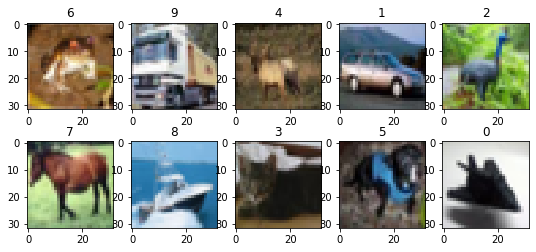

In [10]:
train_x, train_y, test_x, test_y = load_dataset(path_to_dataset)
csidx = [0,1,2,3,4,5,6,7,8,9]
fig = plt.figure(figsize=(9,4))
pos = 0
for i in range(len(train_y)):
    if train_y[i] in csidx:
        pos += 1
        fig.add_subplot(2,5, pos)
        plt.title(train_y[i])
        plt.imshow(train_x[i])
        csidx.remove(train_y[i])
    if len(csidx) == 0:
        break
plt.show()

In [5]:
def load_cifar100(path):
    def unpickle(file):
        with open(file, 'rb') as fo:
            dict = pickle.load(fo, encoding='bytes')
        return dict[b'data'], dict[b'fine_labels'], dict[b'coarse_labels']
    files = os.listdir(path)
    train_x = []
    train_y = []
    train_cy = []
    test_x = []
    test_y = []
    test_cy = []
    if len(files) > 0:
        for f in files:
            if 'preprocessed' in f:
                continue
            else:
                file = os.path.join(path, f)
                data, labels, coarse_labels = unpickle(file)
                if not 'test' in file.lower():
                    if len(train_x) == 0:
                        train_x = np.array(data, dtype=np.float32)
                        train_y = np.array(labels)
                        train_cy = np.array(coarse_labels)
                    else:
                        train_x = np.concatenate((train_x, np.array(data)), axis=0)
                        train_y = np.concatenate((train_y, np.array(labels)), axis=0)
                        train_cy = np.concatenate((train_cy, np.array(coarse_labels)), axis=0)
                else:
                    test_x = np.array(data, dtype=np.float32)
                    test_y = np.array(labels)
                    test_cy = np.array(coarse_labels)
                    
    train_x = train_x.reshape((-1, 3, 32, 32)).transpose([0, 2, 3, 1]) / 255
    test_x = test_x.reshape((-1, 3, 32, 32)).transpose([0, 2, 3, 1]) / 255
    return train_x, train_y, train_cy, test_x, test_y, test_cy

In [6]:
path_to_cifar100 = 'F:/Datasets/CIFAR-100/'


train_100_x, train_100_y, train_100_cy, test_100_x, test_100_y, test_100_cy = load_cifar100(path_to_cifar100)

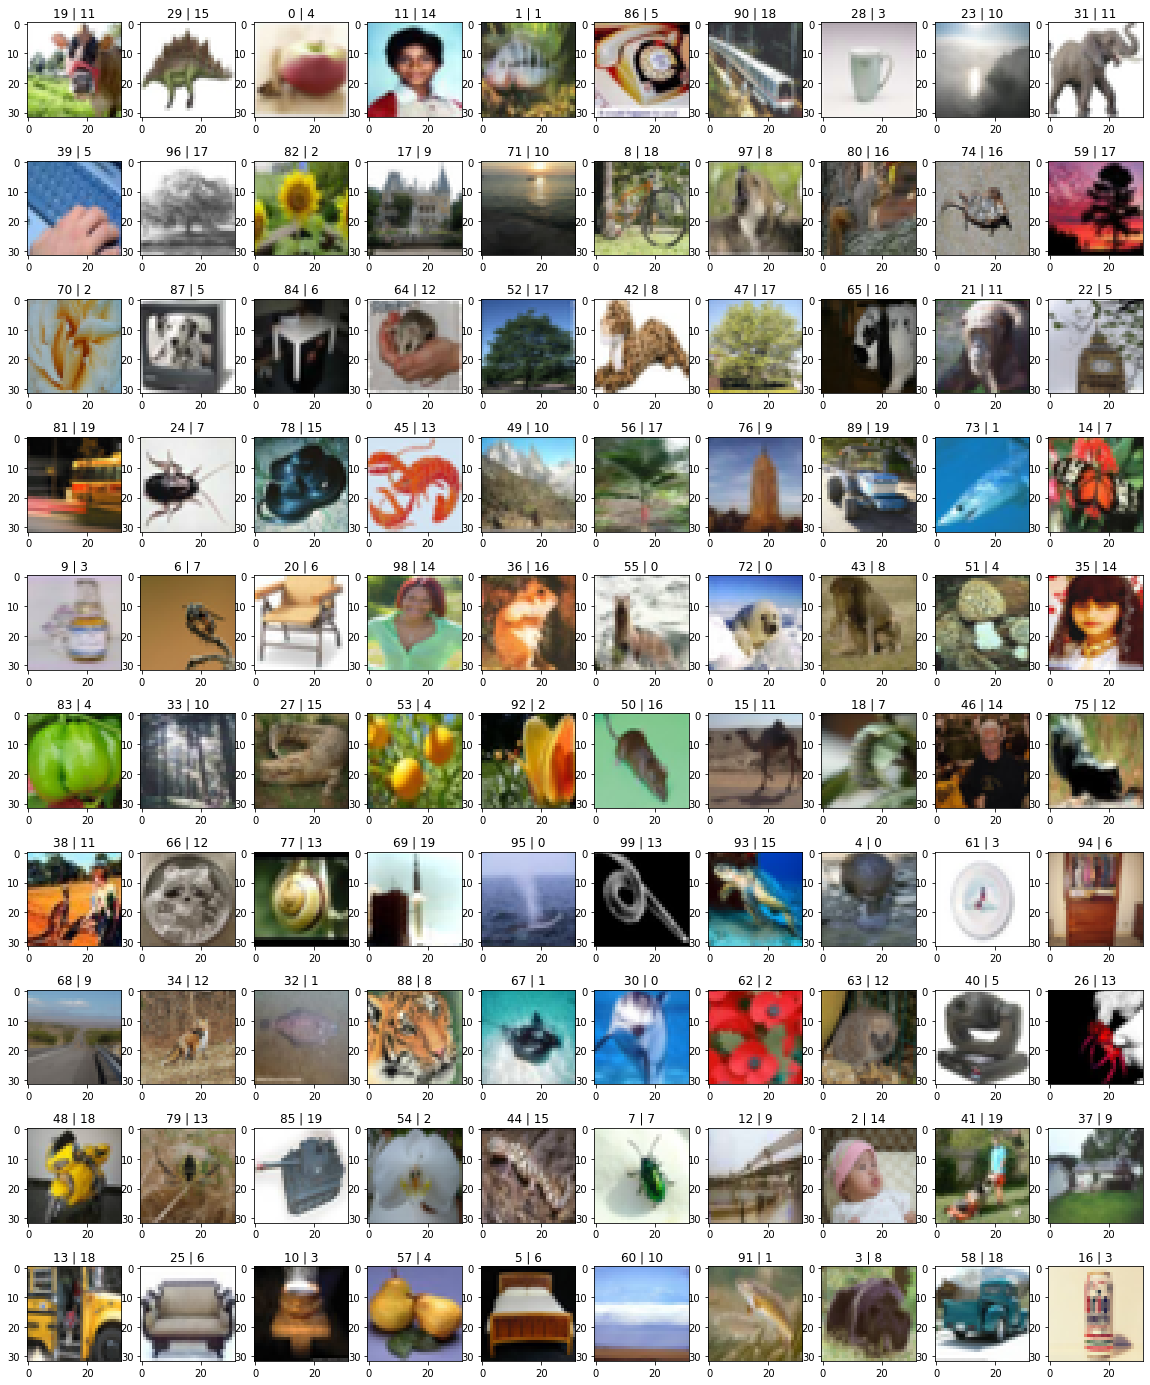

In [17]:
csidx = list(np.arange(100, dtype=int))
fig = plt.figure(figsize=(20,25))
pos = 0
for i in range(len(train_100_y)):
    if train_100_y[i] in csidx:
        pos += 1
        fig.add_subplot(10,10, pos)
        plt.title('{:d} | {:d}'.format(train_100_y[i], train_100_cy[i]))
        plt.imshow(train_100_x[i])
        csidx.remove(train_100_y[i])
    if len(csidx) == 0:
        break
plt.show()

In [7]:
np.unique(train_100_y, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 5

In [11]:
np.unique(train_y,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

Rozdelenie tried v datasete je rovnomerné, 5000 obrázkov pre každú triedu v trénovacej vzorke a 1000 v testovacej.

Labels sú v hodnotách 0-9, pravdepodobne bude potrebné preformátovať na one-hot label.

In [17]:
print("Global mean", train_x.mean())
print("Global std", train_x.std())
print("Global variance", train_x.var())
print("Global max value", train_x.max())
print("Global min value", train_x.min())

Global mean 0.4733649


Global std 0.25156906


Global variance 0.063287
Global max value 1.0
Global min value 0.0


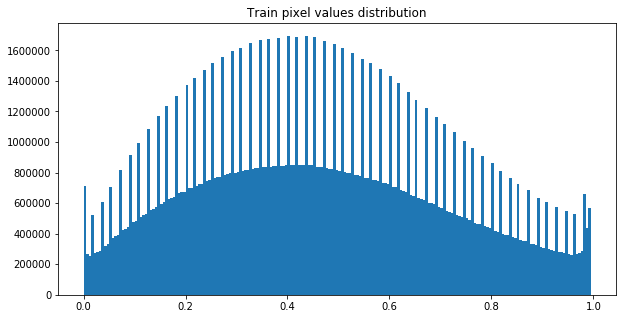

In [26]:
bins = np.arange(200) / 200
plt.figure(figsize=(10,5))
plt.hist(train_x.flatten(), bins)
plt.title('Train pixel values distribution')
plt.show()

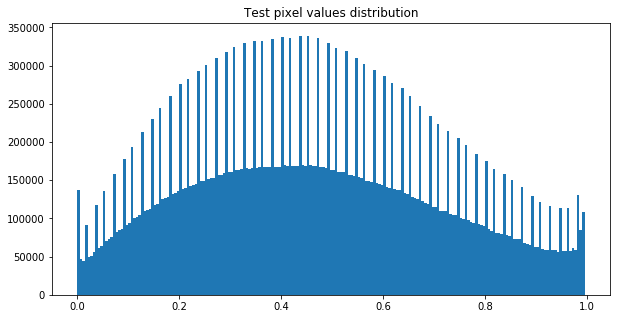

In [27]:
bins = np.arange(200) / 200
plt.figure(figsize=(10,5))
plt.hist(test_x.flatten(), bins)
plt.title('Test pixel values distribution')
plt.show()